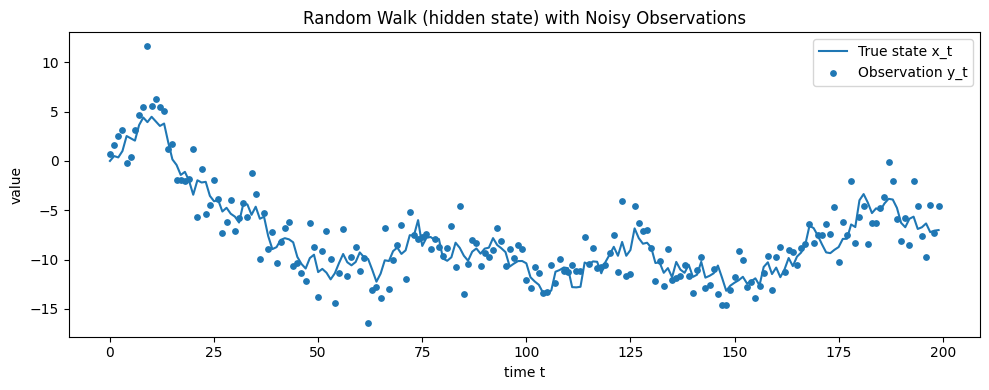

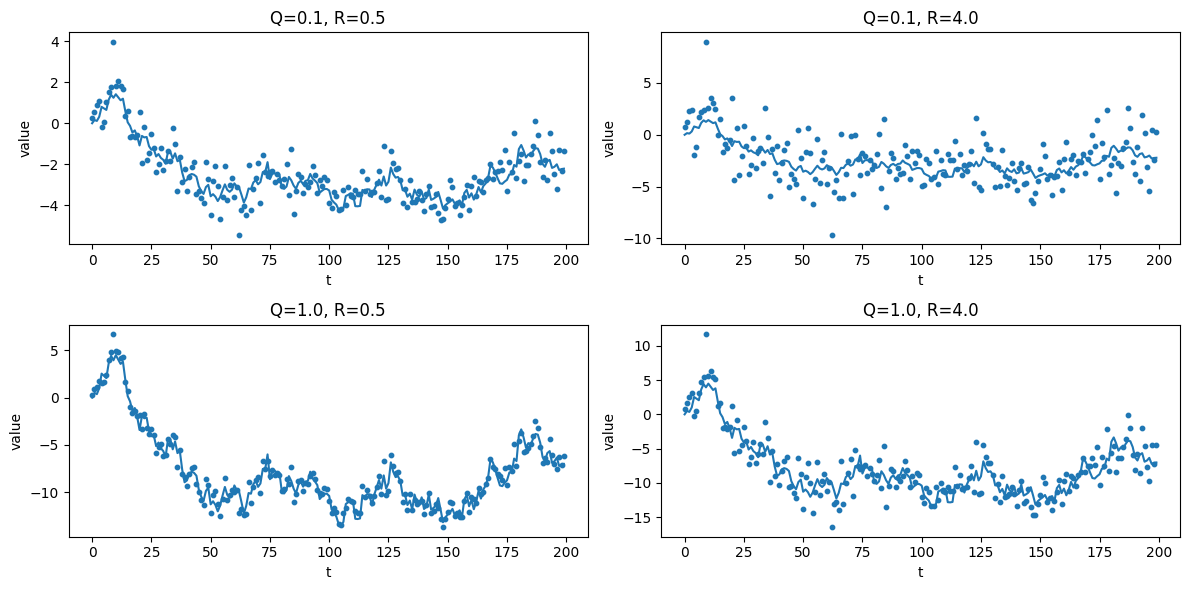

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# 1) 設定參數
# -------------------------
T = 200          # 時間步數
x0 = 0.0         # 初始真實狀態
Q = 1.0          # process noise variance
R = 4.0          # measurement noise variance
seed = 42        # 固定亂數種子，讓結果可重現

np.random.seed(seed)

# -------------------------
# 2) 生成 hidden state x_t（random walk）
#    x_{t+1} = x_t + w_t, w_t ~ N(0, Q)
# -------------------------
w = np.random.normal(loc=0.0, scale=np.sqrt(Q), size=T)  # w_0...w_{T-1}
x = np.zeros(T)
x[0] = x0
for t in range(1, T):
    x[t] = x[t-1] + w[t-1]

# -------------------------
# 3) 生成 observation y_t
#    y_t = x_t + v_t, v_t ~ N(0, R)
# -------------------------
v = np.random.normal(loc=0.0, scale=np.sqrt(R), size=T)
y = x + v

# -------------------------
# 4) 畫圖：true state vs observation
# -------------------------
t_idx = np.arange(T)

plt.figure(figsize=(10, 4))
plt.plot(t_idx, x, label="True state x_t")          # 真實狀態：線
plt.scatter(t_idx, y, s=15, label="Observation y_t")# 觀測值：點
plt.xlabel("time t")
plt.ylabel("value")
plt.title("Random Walk (hidden state) with Noisy Observations")
plt.legend()
plt.tight_layout()
plt.show()



Qs = [0.1, 1.0]
Rs = [0.5, 4.0]

plt.figure(figsize=(12, 6))
plot_id = 1

for Q in Qs:
    for R in Rs:
        np.random.seed(seed)

        w = np.random.normal(0.0, np.sqrt(Q), size=T)
        x = np.zeros(T); x[0] = x0
        for t in range(1, T):
            x[t] = x[t-1] + w[t-1]

        v = np.random.normal(0.0, np.sqrt(R), size=T)
        y = x + v

        plt.subplot(2, 2, plot_id)
        plt.plot(t_idx, x)
        plt.scatter(t_idx, y, s=10)
        plt.title(f"Q={Q}, R={R}")
        plt.xlabel("t"); plt.ylabel("value")
        plot_id += 1

plt.tight_layout()
plt.show()
